14

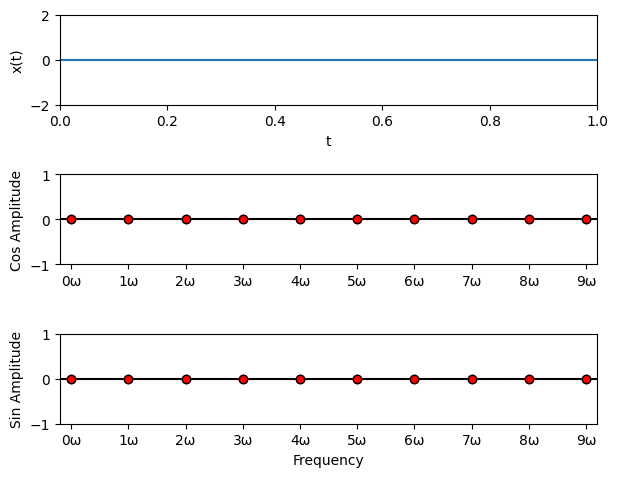

In [1]:
#--------------------------------------#
############### CONTROLS ############### 
# Left click to set coefficients
# Right click in axis to reset corresponding coefficients 
#--------------------------------------#
## Plotting settings
num_terms = 10 #number of harmonics
num_time_points = 200 #number of plotted time points

freq_lim_buffer = 0.2 #buffer on frequency axis
signal_y_lim_min = 2  # +- minimum signal axes limits 
coeff_range = [-1,1]  # min and max coeff values


## Plot style
coeff_marker_face_colour = "r"
coeff_marker_edge_colour = "k"
coeff_marker_size = 6

signal_x_label = "t"
signal_y_label = "x(t)"

freq_x_label = "Frequency"
cos_y_label = "Cos Amplitude"
sin_y_label = "Sin Amplitude"

#--------------------------------------#
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
import numpy as np
#--------------------------------------#

## Setup figures
PERIOD = 1
COS_AX_LABEL = "cos"
SIN_AX_LABEL = "sin"

plt.close(1)
fig = plt.figure(1)


time_range = [0,PERIOD]
x_ax = fig.add_subplot(3,1,1)
x_ax.set_xlabel(signal_x_label)
x_ax.set_ylabel(signal_y_label)
x_ax.set_xlim(time_range)
x_ax.set_ylim([-signal_y_lim_min,signal_y_lim_min])
[x_data] = x_ax.plot(time_range,[0,0])

cos_ax = fig.add_subplot(3,1,2)
cos_ax.set_label(COS_AX_LABEL)

sin_ax = fig.add_subplot(3,1,3,sharex = cos_ax,sharey = cos_ax)
sin_ax.set_label(SIN_AX_LABEL)

fig.tight_layout(pad = 1.5)

sin_ax.set_xlabel(freq_x_label)
x_limits = [0 - freq_lim_buffer, num_terms-1 + freq_lim_buffer]
x_ticks = range(num_terms)
x_tick_labels = [str(term) + "ω" for term in x_ticks]
sin_ax.set_xlim(x_limits)
sin_ax.set_xticks(x_ticks)
sin_ax.set_xticklabels(x_tick_labels)

cos_ax.set_ylabel(cos_y_label)
sin_ax.set_ylabel(sin_y_label)
sin_ax.set_ylim(coeff_range)
sin_ax.set_yticks([coeff_range[0],0,coeff_range[1]])


#--------------------------------------#
## Plot initial data

cos_ax.plot(x_limits,[0,0],"k")
sin_ax.plot(x_limits,[0,0],"k")

coeff_face_style = dict(markerfacecolor = coeff_marker_face_colour,
                        markeredgecolor = coeff_marker_face_colour,
                        marker = "o",
                        linestyle = "none",
                        markersize = coeff_marker_size)

coeff_edge_style = dict(markerfacecolor = "none",
                        markeredgecolor = coeff_marker_edge_colour,
                        marker = "o",
                        linestyle = "none",
                        markersize = coeff_marker_size)


FACE_INDEX = 0
EDGE_INDEX = 1
cos_coeff_markers = []
sin_coeff_markers = []
for iPoint in range(num_terms):
    [cos_coeff_marker] = cos_ax.plot(iPoint,0,**coeff_face_style)
    [cos_coeff_marker_edge] = cos_ax.plot(iPoint,0,**coeff_edge_style)
    cos_coeff_markers.append([cos_coeff_marker,cos_coeff_marker_edge])
    
    [sin_coeff_marker] = sin_ax.plot(iPoint,0,**coeff_face_style)
    [sin_coeff_marker_edge] = sin_ax.plot(iPoint,0,**coeff_edge_style)
    sin_coeff_markers.append([sin_coeff_marker,sin_coeff_marker_edge])

#--------------------------------------#
## Fourier series

def get_x_from_fourier(cos_coeffs,sin_coeffs,omega,t):
    x = np.zeros(num_time_points)
    for n,(a,b) in enumerate(zip(cos_coeffs,sin_coeffs)):
        x = x + a*np.cos(n*omega*t) + b*np.sin(n*omega*t)
    return x

def update_x():
    omega = 2*np.pi/PERIOD
    t = np.linspace(*time_range,num_time_points)
    cos_coeffs = np.zeros(num_terms)
    sin_coeffs = np.zeros(num_terms)
    for iTerm,(cos_marker,sin_marker) in enumerate(zip(cos_coeff_markers,sin_coeff_markers)):
        [cos_coeffs[iTerm]] = cos_marker[EDGE_INDEX].get_ydata()
        [sin_coeffs[iTerm]] = sin_marker[EDGE_INDEX].get_ydata()
    
    x = get_x_from_fourier(cos_coeffs,sin_coeffs,omega,t)
    x_range = [min([min(x),-signal_y_lim_min]),max([max(x),signal_y_lim_min])]
    x_ax.set_ylim(x_range)
    x_data.set_xdata(t)
    x_data.set_ydata(x)


#--------------------------------------#
## Define interaction
def on_mouse_move(event):
    ax = event.inaxes
    if not ax:
        return
    if ax.get_label() not in [SIN_AX_LABEL, COS_AX_LABEL]:
        return
    
    mouse_x = event.xdata
    mouse_y = event.ydata
    nearest_coeff = round(mouse_x)
    if ax.get_label() == SIN_AX_LABEL:
        marker_data = sin_coeff_markers
    elif ax.get_label() == COS_AX_LABEL:
        marker_data = cos_coeff_markers
    
    
    for (iMarker,marker_set) in enumerate(marker_data):
        marker_edge = marker_set[EDGE_INDEX]
        if iMarker == nearest_coeff:
            marker_edge.set_ydata([mouse_y])
            continue
        
        marker_face = marker_set[FACE_INDEX]
        marker_edge.set_ydata(marker_face.get_ydata())
    
    update_x()
    event.canvas.draw()
        

def on_mouse_click(event):
    ax = event.inaxes
    if not ax: return
    if event.button is MouseButton.LEFT:
        
        if ax.get_label() not in [SIN_AX_LABEL, COS_AX_LABEL]: return
        
        mouse_x = event.xdata
        nearest_coeff = round(mouse_x)
        if ax.get_label() == SIN_AX_LABEL:
            marker_data = sin_coeff_markers
        elif ax.get_label() == COS_AX_LABEL:
            marker_data = cos_coeff_markers
        marker_face = marker_data[nearest_coeff][FACE_INDEX]
        marker_edge = marker_data[nearest_coeff][EDGE_INDEX]
        marker_face.set_ydata(marker_edge.get_ydata())
        
        event.canvas.draw()
        
    elif event.button is MouseButton.RIGHT:
        if ax.get_label() == SIN_AX_LABEL:
            for sin_marker in sin_coeff_markers:
                sin_marker[FACE_INDEX].set_ydata([0])
                sin_marker[EDGE_INDEX].set_ydata([0])
        elif ax.get_label() == COS_AX_LABEL:
            for cos_marker in cos_coeff_markers:
                cos_marker[FACE_INDEX].set_ydata([0])
                cos_marker[EDGE_INDEX].set_ydata([0])
        
        update_x()
        event.canvas.draw()
        
def on_axes_leave(event):
    for (cos_marker,sin_marker) in zip(cos_coeff_markers,sin_coeff_markers):
        cos_marker[EDGE_INDEX].set_ydata(cos_marker[FACE_INDEX].get_ydata())
        sin_marker[EDGE_INDEX].set_ydata(sin_marker[FACE_INDEX].get_ydata())
    
    update_x()
    event.canvas.draw()
    
def on_fig_close(event):
    plt.disconnect(mouse_move_binding_id)
    plt.disconnect(leave_axes_binding_id)
    plt.disconnect(mouse_click_binding_id)
    

mouse_move_binding_id = plt.connect('motion_notify_event', on_mouse_move)
leave_axes_binding_id = plt.connect('axes_leave_event', on_axes_leave)
mouse_click_binding_id = plt.connect('button_press_event', on_mouse_click)
plt.connect('close_event', on_fig_close)